This data set was provided by the Co-Learning Lounge. It is a data set of prices(target vailue) and other attributes for around 27,000 cubic xirconia samples. It is a diamond alternative and sheres many of the same qualities as a diamond. The goals of this project modle is to make a linier model and to find the top 5 attrabutes to lead to higher priceing.

Data dictonory:

Carat: The cart weight of the cubic zirocia (Contunues)

Cut: This tell us what the cut quality of the cubic zirconia is.

Color: Colour of the cibic zirconia. with D being the Best and J the worst.

Clarity: The clarity refers to the absence of the inclusion and blemishes.

Depth: This is the hight of the cibic zirconia when messared from the culet (bottom) of the diamond

Table: This is the width of the cubix zirconia as a precentate of its average diameter

Price: The price of cubix zirconia (our targit verable)

X: Length of the cubic zirconia in mm

Y: Width of the cubic zirconia in mm.

Z:  Height of the cubic zirconia in mm.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

# To encode categorical variables
from sklearn.preprocessing import LabelEncoder

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The first step is read the data set from the CSV file and create a data frame for us to minpulate the data.

In [2]:
# Importing the dataset from a CSV file
# The file is located in Google Drive under the specified path
# 'pd.read_csv()' reads the CSV file and loads it into a pandas DataFrame
data = pd.read_csv("/content/drive/MyDrive/Portfolio/Linear Regression /cubic_zirconia 2.csv")

Next we will copy the data to new data frame so we dont mess with the origianl data frame

In [3]:
# Creating a copy of the original dataset
# This ensures that any modifications made to 'gems' do not affect the original 'data' DataFrame
gems = data.copy()

Now lets look at the data to see how it is strucheared.

In [4]:
# Displaying the first five rows of the dataset
# This helps in understanding the structure, column names, and sample data
gems.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [5]:
# Checking the dimensions of the dataset
# Returns a tuple (number of rows, number of columns)
# Helps in understanding the dataset size
gems.shape

(26967, 11)

Now we will use our info() funchion to check on the the inofrmation of the columns.

In [6]:
# Displaying a summary of the dataset
# Provides information about column names, data types, and non-null values
# Helps in identifying missing data and understanding dataset structure
gems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


From what we can see here their is a id colleaum called "Unnamed: 0". This colleam will not help with our modules so we need to drop it.

In [7]:
# Dropping the unnecessary "Unnamed: 0" column
# This column is likely an index column from the original dataset and is not needed for analysis
gems=gems.drop(columns=["Unnamed: 0"])

Now lets check to see how it is struechered without the colleam

In [8]:
# Displaying the first five rows of the cleaned dataset
# This helps verify that the unnecessary column has been removed successfully
gems.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


Our next task for data clean up is fidning out how many of records in the gems data frames are duplicated.

In [9]:
# Checking for duplicate rows in the dataset
# The 'duplicated()' method returns a boolean series, and 'sum()' counts the number of True values (duplicates)
# Helps in identifying any repeated entries that might skew analysis
gems.duplicated().sum()

34

Given that their is 34 duplicated rows and that it is a smail persitige of the datam it is in our best intrestet to deleate them using the drop_duplicates() funchtion

In [10]:
# Removing duplicate rows from the dataset
# The 'drop_duplicates()' method removes any repeated rows, and 'inplace=True' modifies the dataset directly
# This step ensures the dataset is clean and free from duplicates before proceeding with further analysis
gems.drop_duplicates(inplace=True)

Now lets see if we have any null veualues.

In [11]:
# Checking for missing (null) values in each column of the dataset
# The 'isnull()' method returns a boolean DataFrame, and 'sum()' counts the number of True values (nulls) in each column
# This helps identify columns that may require imputation or further cleaning
gems.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,697
table,0
x,0
y,0
z,0
price,0


It looks like their is 697 rows where depth is missing. again this is a very smail part of the data set so the best opton is to drop the rows. We can do this by using the dropna() funchion.

In [12]:
# Removing rows with missing (null) values from the dataset
# The 'dropna()' method removes any rows that contain null values, and 'inplace=True' modifies the dataset directly
# This step ensures the dataset is complete and doesn't have missing values before analysis
gems.dropna(inplace=True)

Now lets use the describe() fuchetion to see the stats of our intager colleum.

In [13]:
# Generating summary statistics for the dataset
# The 'describe()' method provides key metrics like mean, standard deviation, min, max, and percentiles for each numeric column
# The '.T' transposes the output for better readability, showing statistics as rows and features as columns
gems.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26236.0,0.797620,0.476691,0.2,0.40,0.70,1.05,4.50
depth,26236.0,61.745285,1.412243,50.8,61.00,61.80,62.50,73.60
table,26236.0,57.455877,2.230866,49.0,56.00,57.00,59.00,79.00
x,26236.0,5.728646,1.126332,0.0,4.71,5.69,6.54,10.23
y,26236.0,5.732487,1.165283,0.0,4.72,5.70,6.54,58.90
z,26236.0,3.536339,0.698608,0.0,2.90,3.52,4.04,8.06
price,26236.0,3935.926818,4019.809223,326.0,945.00,2374.00,5356.00,18818.00


rom the summary, we can make several observations:

There are clearly some errors in our dataset, as some data points have X, Y, and Z values of 0. This is impossible because it would imply that the gems have no mass and, therefore, do not exist.

There are some larger gems in this dataset. For example, one gem has a Y value of 58. However, this does not necessarily mean we should remove these as outliers. These are most likely real gems and should be retained in the analysis.


Given our findings that some gems do not have any measurements, it is likely a mistake and these entries will need to be removed.

In [14]:
gems.loc[gems['x'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


Since there are only two rows with missing measurements, we can confidently remove them from the dataset.

In [15]:
gems = gems[gems['x'] != 0]

We are going to create cat_col and num_col for easier calculations.





In [16]:
# Defining a list of categorical columns in the dataset
# 'cut', 'color', and 'clarity' are categorical features that describe the properties of the gems
# This list will be useful for preprocessing tasks like encoding or transforming categorical variables
cat_col = ['cut', 'color', 'clarity']

In [17]:
# Defining a list of numerical columns in the dataset
# 'carat', 'depth', 'table', 'price', 'x', 'y', and 'z' are numerical features representing physical attributes and price of the gems
# This list will be useful for numerical data preprocessing, like scaling or normalization
num_col = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [18]:
# Iterating through each categorical column in the 'cat_col' list
# The 'value_counts(1)' method calculates the relative frequency (proportion) of each unique value in the column
# This helps in understanding the distribution of categorical features in the dataset
for column in cat_col: # Displaying the relative frequency of each category in the column
    print(data[column].value_counts(1)) # Adding a separator between the outputs for clarity
    print("-" * 50)

cut
Ideal        0.401083
Premium      0.255831
Very Good    0.223607
Good         0.090518
Fair         0.028961
Name: proportion, dtype: float64
--------------------------------------------------
color
G    0.209923
E    0.182334
F    0.175362
H    0.152112
D    0.124003
I    0.102755
J    0.053510
Name: proportion, dtype: float64
--------------------------------------------------
clarity
SI1     0.243668
VS2     0.226165
SI2     0.169652
VS1     0.151778
VVS2    0.093855
VVS1    0.068194
IF      0.033152
I1      0.013535
Name: proportion, dtype: float64
--------------------------------------------------


Cut Proportions: The highest proportion is for "Ideal" (40.11%), followed by "Premium" (25.58%) and "Very Good" (22.36%). "Good" and "Fair" make up smaller proportions (9.05% and 2.90%, respectively).

Color Proportions: The most common color is "G" (20.99%), followed by "E" (18.23%) and "F" (17.54%). Colors "I" and "J" have lower proportions (10.28% and 5.35%).

Clarity Proportions: The majority of stones have "SI1" (24.37%) and "VS2" (22.62%) clarity, with "SI2" (16.97%) and "VS1" (15.18%) following. The least common are "IF" (3.32%) and "I1" (1.35%).

Now we’re going to create a function to combine a histogram and boxplot, as shown below.

In [19]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram

Now, let’s visualize the numerical data using the histogram_boxplot function we created.



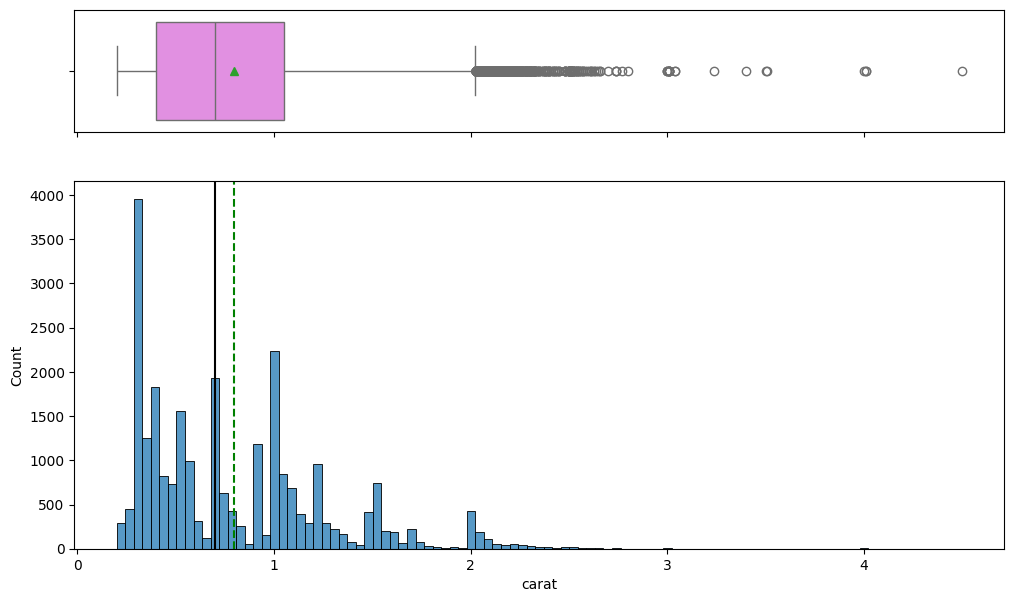

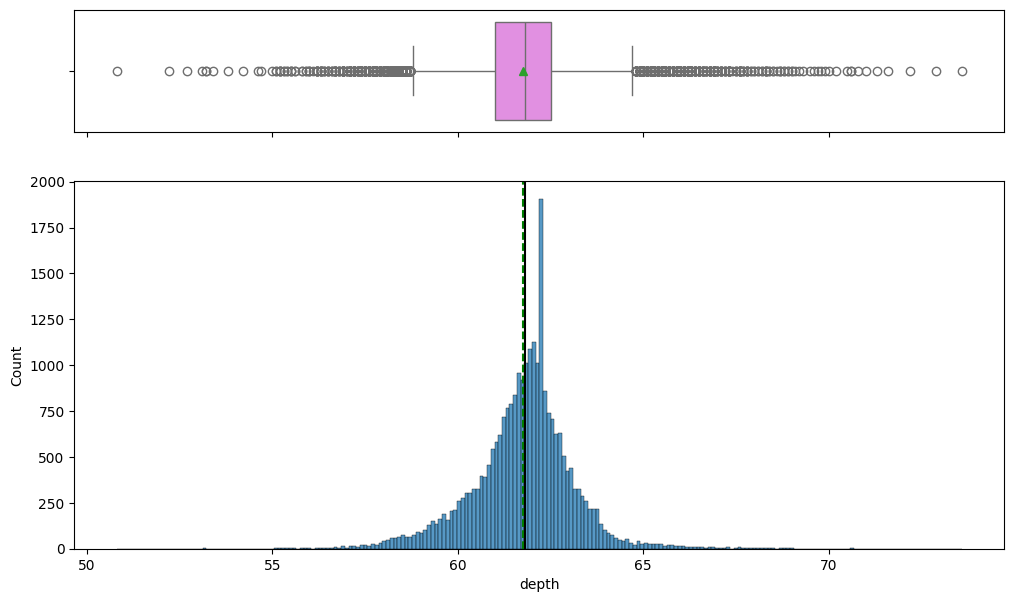

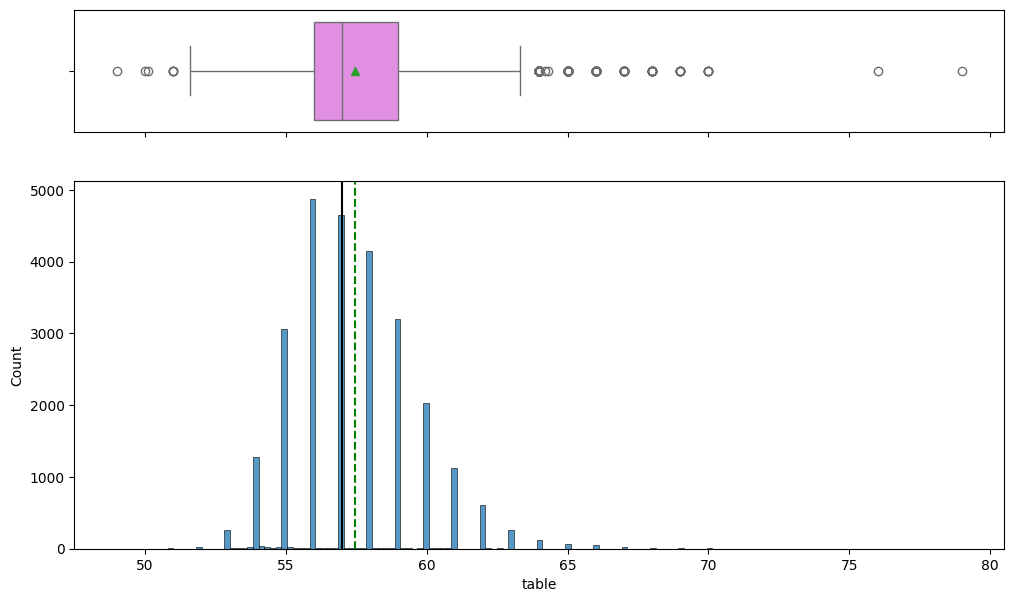

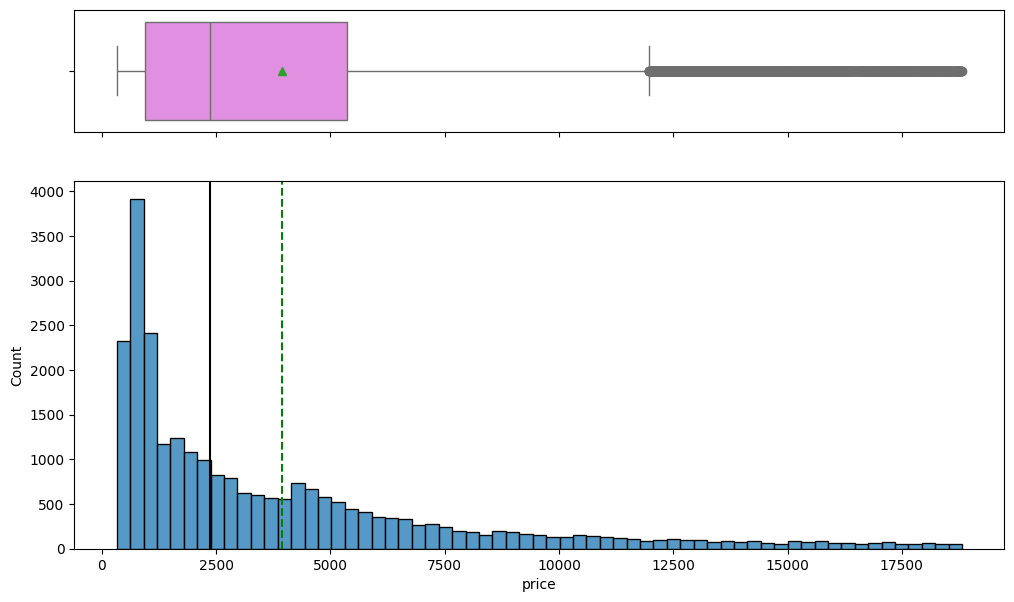

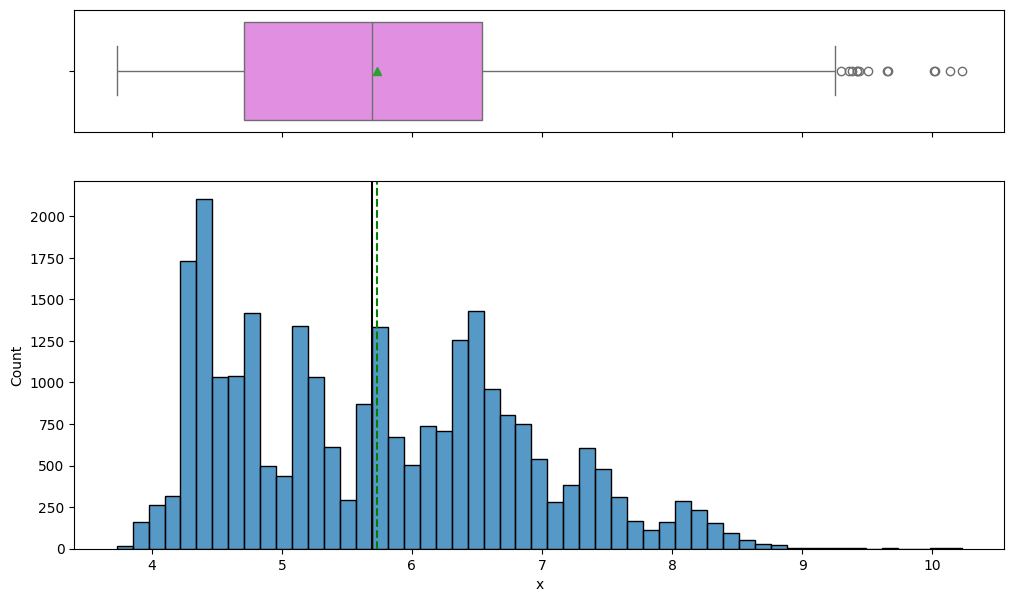

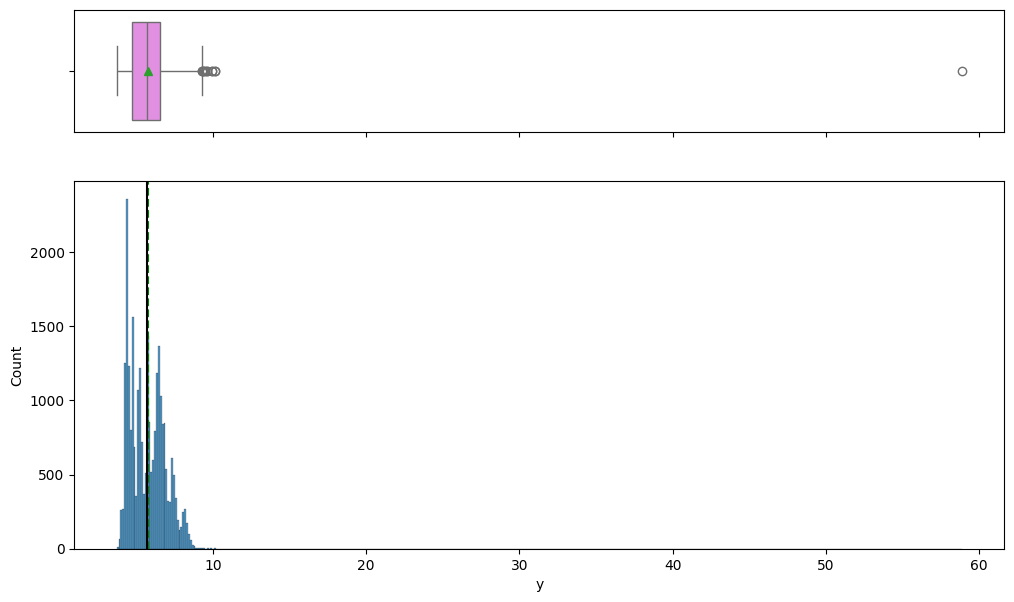

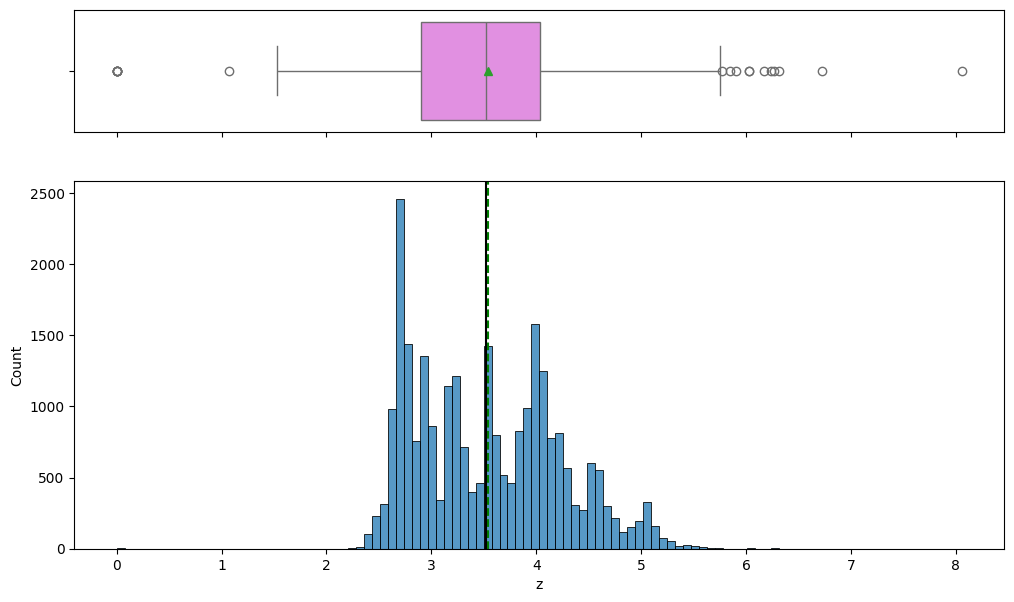

In [20]:
# Iterating through each numerical column in the 'num_col' list
# For each numerical feature, the 'histogram_boxplot' function will visualize both the distribution (histogram) and outliers (boxplot)
# This helps in understanding the spread, skewness, and any potential outliers in the numerical data
for column in num_col:
    histogram_boxplot(gems, column) # Calling the function to visualize the distribution and outliers for each numerical feature

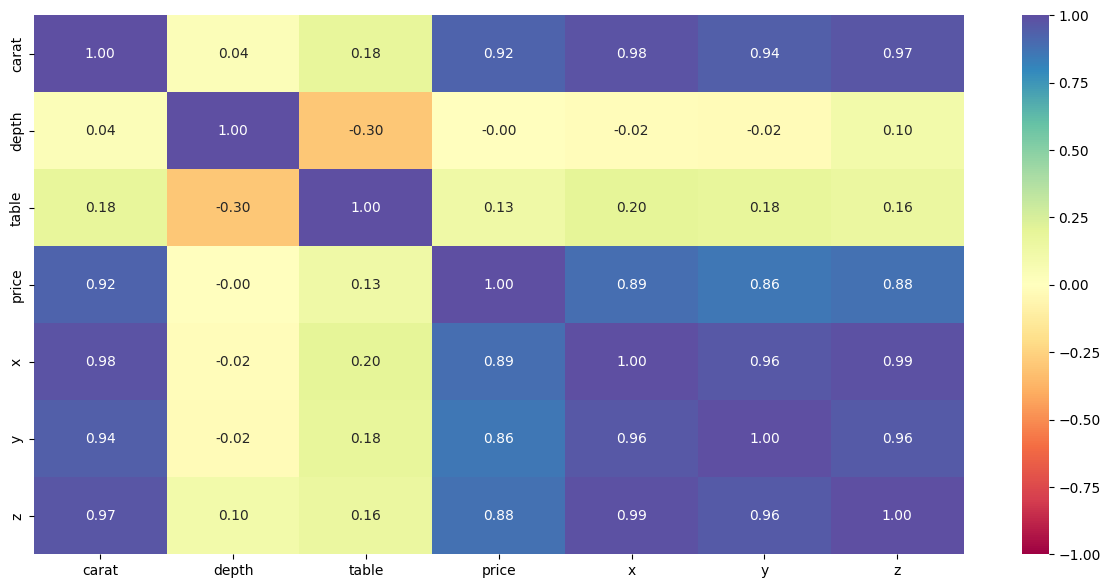

In [21]:
# Visualizing the correlation matrix of numerical features in the dataset
# 'corr()' computes the pairwise correlation of the numerical columns in the dataset
# 'sns.heatmap()' generates a heatmap to display the correlation values
# The 'annot=True' option adds the correlation values on the heatmap
# 'vmin' and 'vmax' set the color scale range from -1 (negative correlation) to 1 (positive correlation)
# 'fmt=".2f"' formats the correlation values to 2 decimal places
# 'cmap="Spectral"' specifies the color map for the heatmap
plt.figure(figsize=(15, 7))# Adjusting the figure size for better readability
sns.heatmap(gems[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show() # Displaying the heatmap

From what we are seeing there is a strong corlasion with the mesearment elements X,Y and Z. This will make it nessaery to make a new feacher to called valoum

In [22]:
gems['volume'] = gems['x'] * gems['y'] * gems['z']
gems['depth_table_ratio'] = gems['depth'] / gems['table']

In [23]:
gems = gems.drop(columns=['x','y','z']) # Use the drop method of the DataFrame directly.

In [50]:
num_col = ['carat', 'depth', 'table', 'price', 'volume', 'depth_table_ratio']

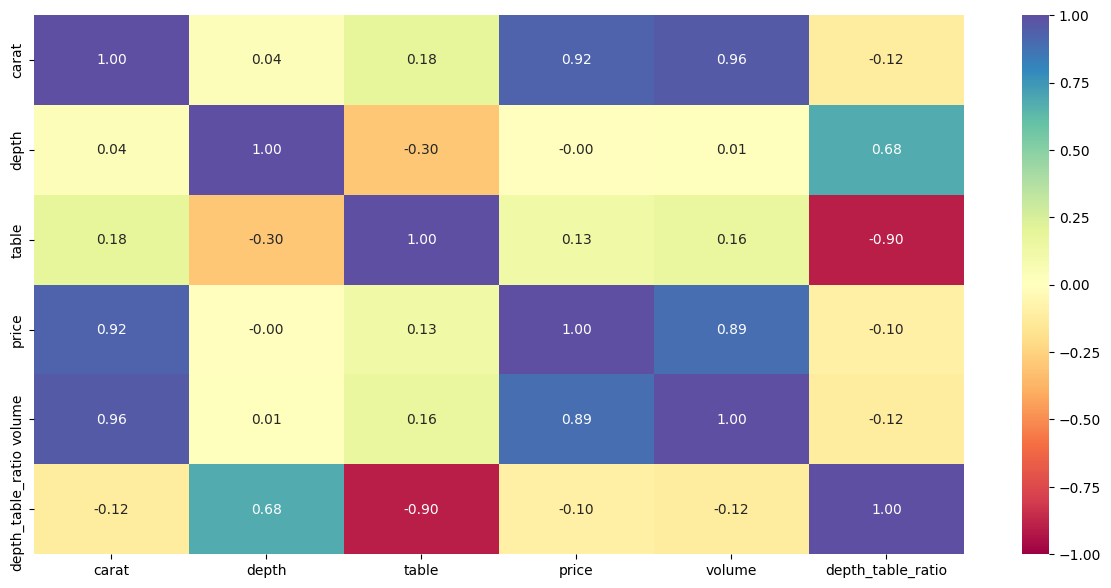

In [51]:
plt.figure(figsize=(15, 7))# Adjusting the figure size for better readability
sns.heatmap(gems[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show() # Displaying the heatmap

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
gems[['carat', 'depth', 'table', 'volume','depth_table_ratio']] = scaler.fit_transform(gems[['carat', 'depth', 'table', 'volume', 'depth_table_ratio']])

In [25]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins = True).sort_values(
        by = sorter, ascending = False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize = "index").sort_values(
        by = sorter, ascending = False
    )
    tab.plot(kind = "bar", stacked = True, figsize = (count + 1, 5))
    plt.legend(
        loc = "lower left",
        frameon = False,
    )
    plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))
    plt.show()

<Axes: xlabel='cut', ylabel='price'>

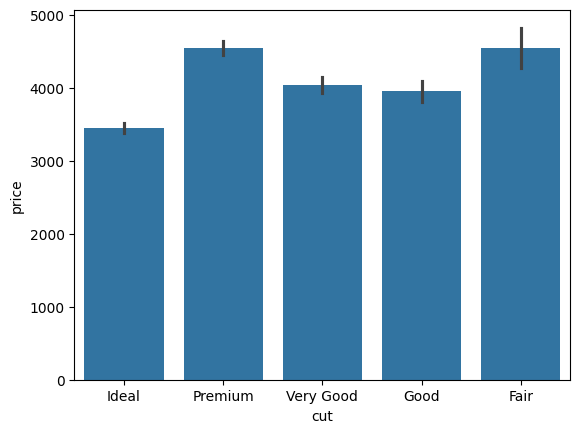

In [26]:
# Creating a bar plot to visualize the relationship between 'cut' (categorical variable) and 'price' (numerical variable)
# 'sns.barplot()' plots the average price for each category in the 'cut' feature
# The 'x' axis represents the different cut types, while the 'y' axis shows the average price for each cut type
sns.barplot(data=gems, x='cut', y='price') # Visualizing how the price varies by cut type

<Axes: xlabel='color', ylabel='price'>

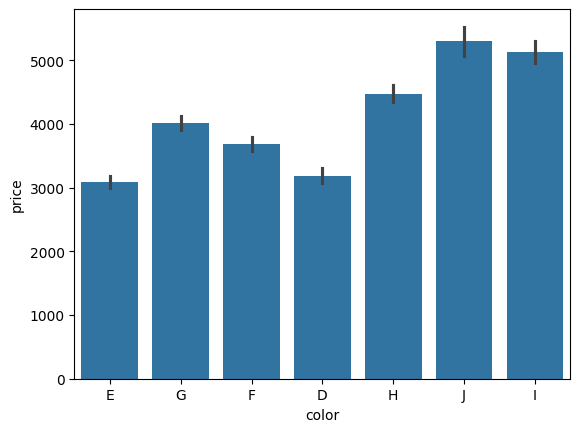

In [27]:
# Creating a bar plot to visualize the relationship between 'color' (categorical variable) and 'price' (numerical variable)
# 'sns.barplot()' calculates and plots the average price for each color category
# The 'x' axis represents the different color grades, while the 'y' axis shows the average price for each color grade
sns.barplot(data=gems, x='color', y='price') # Analyzing how price varies across different color grades

<Axes: xlabel='clarity', ylabel='price'>

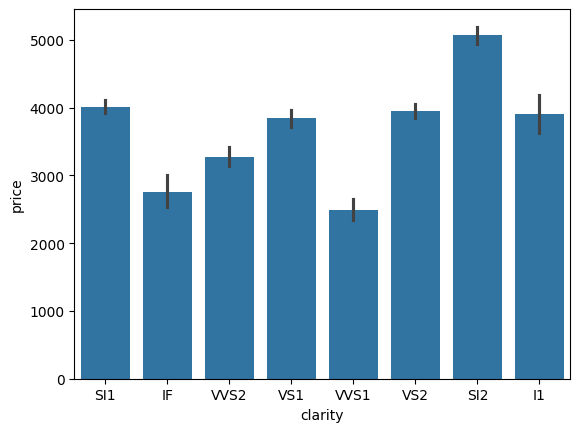

In [28]:
# Creating a bar plot to visualize the relationship between 'clarity' (categorical variable) and 'price' (numerical variable)
# 'sns.barplot()' calculates and plots the average price for each clarity category
# The 'x' axis represents the different clarity grades, while the 'y' axis shows the average price for each clarity grade
sns.barplot(data=gems, x='clarity', y='price') # Examining how clarity affects the price of gems

clarity     I1   IF   SI1   SI2   VS1   VS2  VVS1  VVS2    All
cut                                                           
All        354  871  6402  4435  3984  5919  1791  2478  26234
Premium    106  112  1764  1396   971  1638   302   405   6694
Fair        85    3   189   220    89   122    10    37    755
Ideal       72  599  2095  1287  1737  2459  1004  1282  10535
Good        49   30   743   510   321   482    99   141   2375
Very Good   42  127  1611  1022   866  1218   376   613   5875
------------------------------------------------------------------------------------------------------------------------


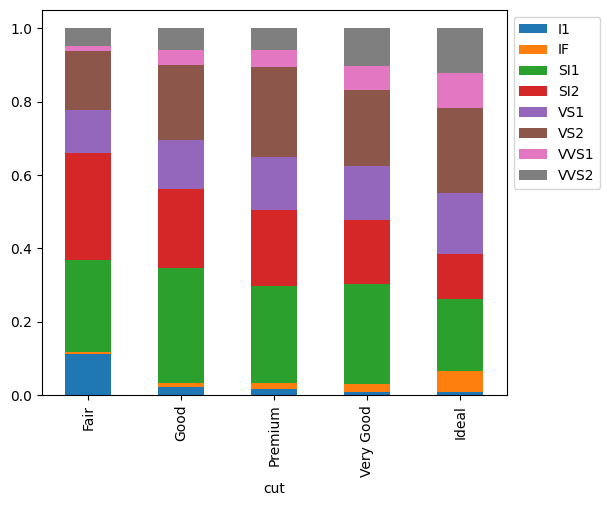

In [29]:
# Creating a stacked bar plot to visualize the relationship between 'cut' and 'clarity' features
# This plot shows the distribution of clarity within each cut category
# The function 'stacked_barplot()' takes in two categorical variables and visualizes their joint distribution as a stacked bar plot
stacked_barplot(gems, "cut", "clarity") # Displaying how clarity is distributed across different cut types

color         D     E     F     G     H     I     J    All
cut                                                       
All        3265  4792  4605  5520  3984  2670  1398  26234
Ideal      1376  1914  1854  2397  1517  1035   442  10535
Premium     787  1148  1131  1438  1123   677   390   6694
Very Good   724  1155  1039  1134   861   619   343   5875
Good        305   479   439   408   338   250   156   2375
Fair         73    96   142   143   145    89    67    755
------------------------------------------------------------------------------------------------------------------------


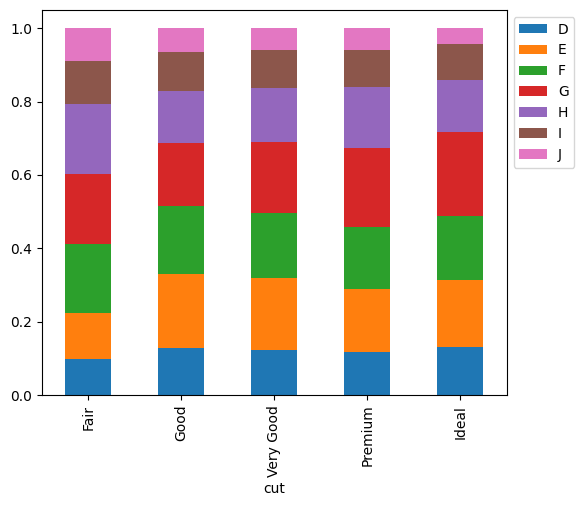

In [30]:
# Creating a stacked bar plot to visualize the relationship between 'cut' and 'color' features
# This plot shows how the different color grades are distributed within each cut category
# The function 'stacked_barplot()' takes in two categorical variables and visualizes their joint distribution as a stacked bar plot
stacked_barplot(gems, "cut", "color")  # Analyzing how color is distributed across different cut types

clarity   I1   IF   SI1   SI2   VS1   VS2  VVS1  VVS2    All
color                                                       
All      354  871  6402  4435  3984  5919  1791  2478  26234
H         80  148  1053   765   576   778   283   301   3984
F         65  178  1058   733   656  1076   349   490   4605
G         65  332   978   755  1055  1180   492   663   5520
E         51   83  1219   821   611  1169   338   500   4792
I         47   66   707   453   460   572   176   189   2670
D         25   38  1011   660   363   782   115   271   3265
J         21   26   376   248   263   362    38    64   1398
------------------------------------------------------------------------------------------------------------------------


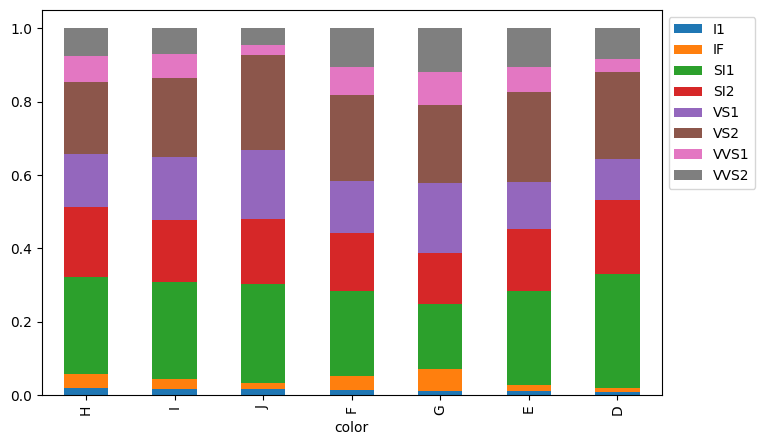

In [31]:
# Creating a stacked bar plot to visualize the relationship between 'color' and 'clarity' features
# This plot shows how clarity grades are distributed within each color category
# The function 'stacked_barplot()' takes in two categorical variables and visualizes their joint distribution as a stacked bar plot
stacked_barplot(gems, "color", "clarity") # Exploring how clarity is distributed across different color grades

In [32]:
# Converting categorical variables into numerical format using one-hot encoding
# The 'pd.get_dummies()' function converts each categorical feature into a separate binary column
# 'drop_first=True' ensures that we avoid multicollinearity by dropping the first level of each categorical feature
# 'select_dtypes(include=["object", "category"])' automatically selects columns of object or category data type for encoding
gems = pd.get_dummies(
    gems, # DataFrame being transformed
    columns = gems.select_dtypes(include = ["object", "category"]).columns.tolist(), # Selecting categorical columns
    drop_first = True, # Avoiding multicollinearity by dropping the first category in each column
)


In [33]:
# Splitting the data into features (X) and target variable (y)
# 'X' represents the independent variables (all columns except 'price')
# 'y' represents the dependent variable (target: 'price')
x = gems.drop('price',axis=1) # Dropping the 'price' column from the dataset to create feature set
y = gems['price'] # Setting 'price' as the target variable

In [34]:
# Splitting the dataset into training and testing sets
# 'train_test_split()' randomly splits the data into training (80%) and testing (20%) sets
# 'shuffle=True' ensures that the data is shuffled before splitting
# 'random_state=1' ensures reproducibility of the split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 1)

In [35]:
# Printing the shapes of the training and test sets
# 'x_train.shape' gives the dimensions (number of rows and columns) of the training features
# 'x_test.shape' gives the dimensions of the testing features
print("Shape of Training set : ", x_train.shape)
print("Shape of Test set : ", x_test.shape)

Shape of Training set :  (20987, 22)
Shape of Test set :  (5247, 22)


In [36]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)                  # Predict using the independent variables
    r2 = r2_score(target, pred)                       # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)    # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mae = mean_absolute_error(target, pred)           # To compute MAE
    mape = mape_score(target, pred)                   # To compute MAPE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [37]:
# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state = 1)

# Fitting the model
dt_regressor.fit(x_train, y_train)

# Model Performance on the test data, i.e., prediction
dt_regressor_perf_test = model_performance_regression(dt_regressor, x_test, y_test)

dt_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,835.222066,394.784131,0.955015,0.954826,11.267762


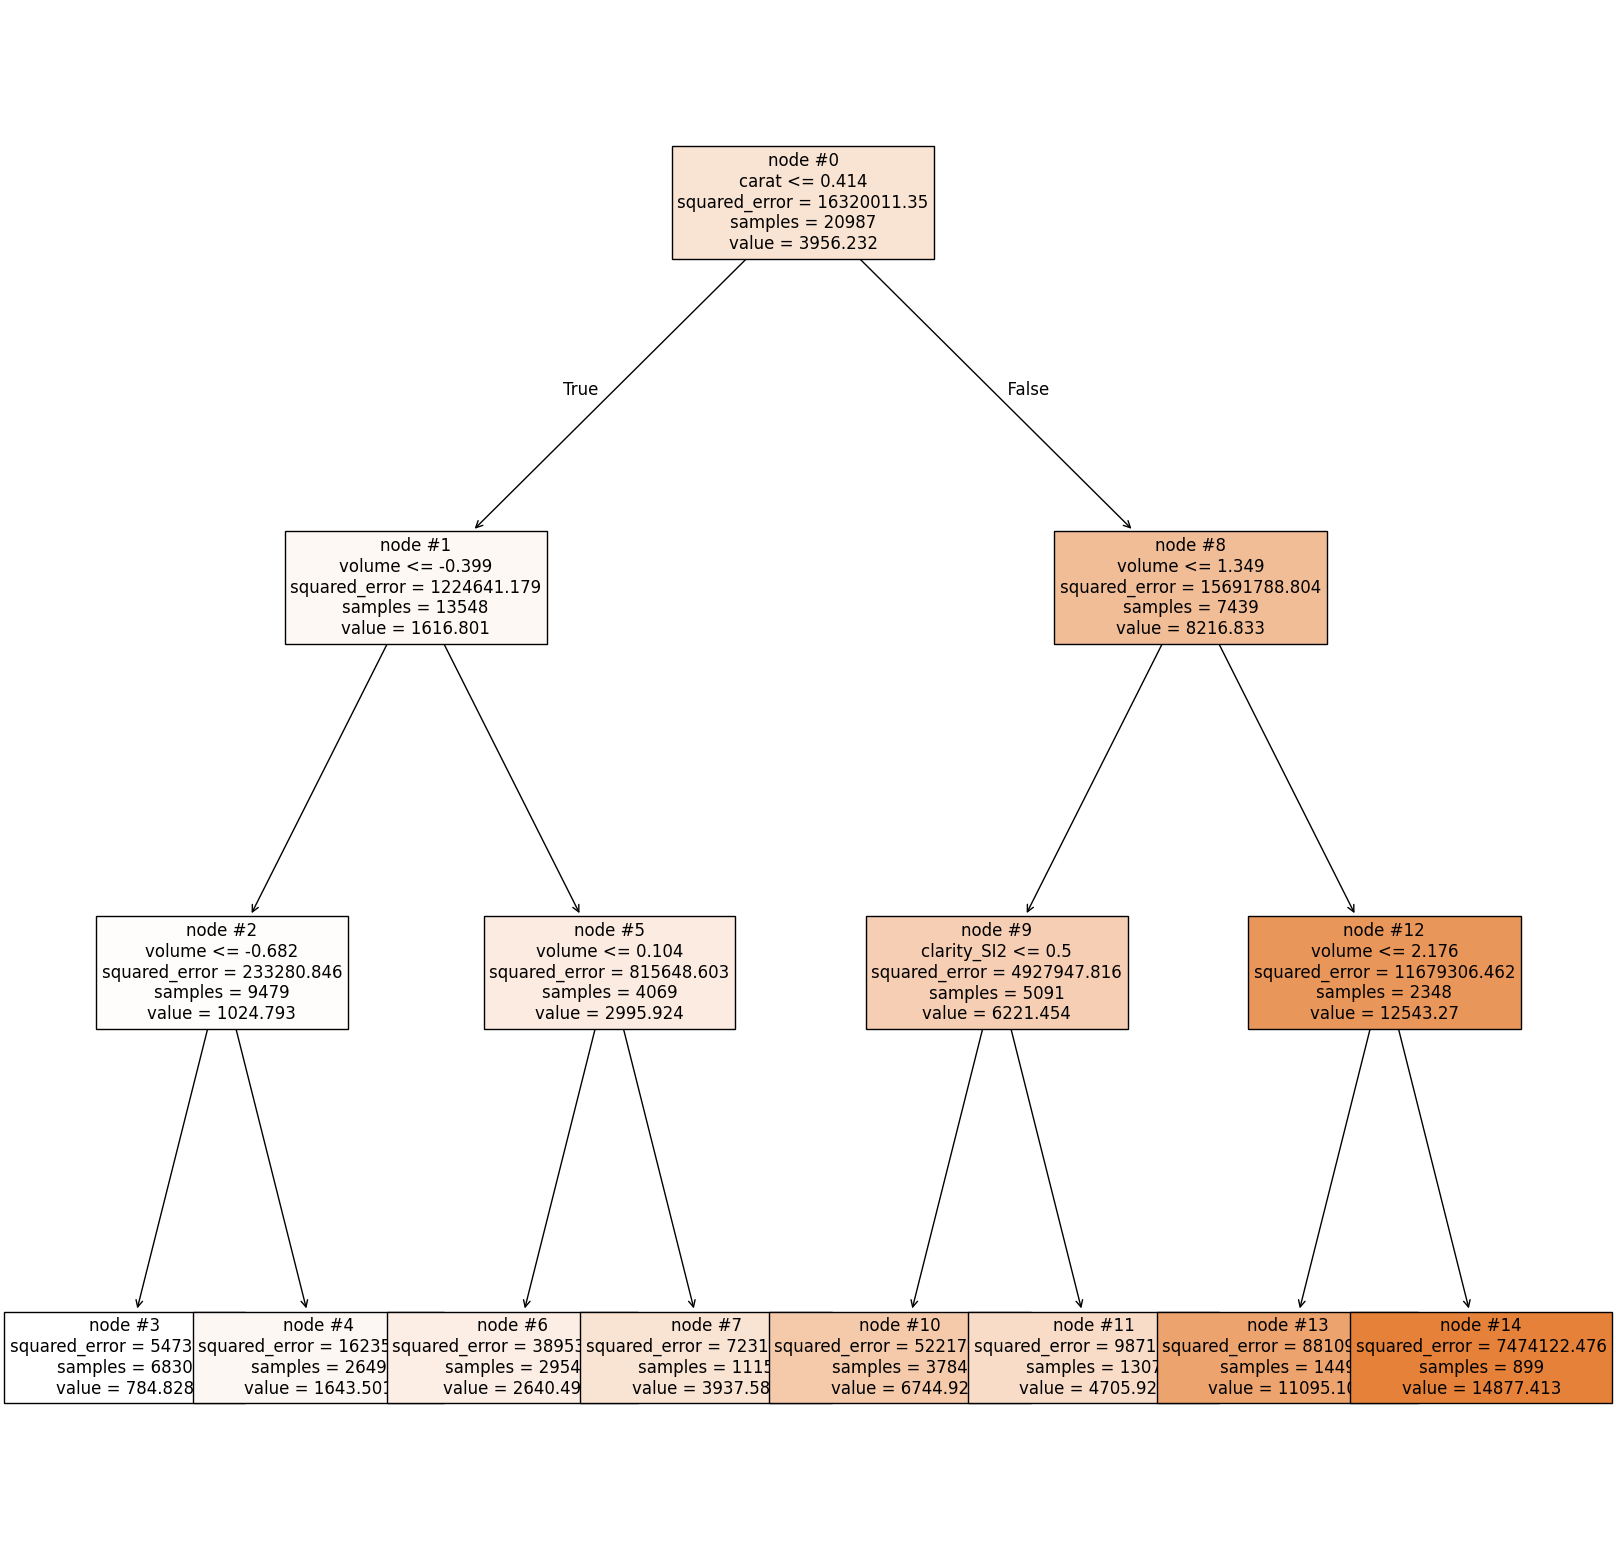

In [38]:
from sklearn import tree
features = list(x.columns)

# Building the model with max_depth=3
dt_regressor_visualize = DecisionTreeRegressor(random_state = 1, max_depth=3)

# Fitting the model
dt_regressor_visualize.fit(x_train, y_train)


plt.figure(figsize = (20, 20))
tree.plot_tree(dt_regressor_visualize, feature_names = features, filled = True, fontsize = 12,
               node_ids = True, class_names = None)
plt.show()

In [39]:
print(tree.export_text(dt_regressor_visualize, feature_names=x_train.columns.tolist(), show_weights=True))

|--- carat <= 0.41
|   |--- volume <= -0.40
|   |   |--- volume <= -0.68
|   |   |   |--- value: [784.83]
|   |   |--- volume >  -0.68
|   |   |   |--- value: [1643.50]
|   |--- volume >  -0.40
|   |   |--- volume <= 0.10
|   |   |   |--- value: [2640.49]
|   |   |--- volume >  0.10
|   |   |   |--- value: [3937.58]
|--- carat >  0.41
|   |--- volume <= 1.35
|   |   |--- clarity_SI2 <= 0.50
|   |   |   |--- value: [6744.92]
|   |   |--- clarity_SI2 >  0.50
|   |   |   |--- value: [4705.92]
|   |--- volume >  1.35
|   |   |--- volume <= 2.18
|   |   |   |--- value: [11095.10]
|   |   |--- volume >  2.18
|   |   |   |--- value: [14877.41]



In [40]:
# Bagging Regressor
bagging_estimator = BaggingRegressor(random_state = 1)

# Fitting the model
bagging_estimator.fit(x_train, y_train)

# Model Performance on the test data
bagging_estimator_perf_test = model_performance_regression(bagging_estimator, x_test, y_test)

bagging_estimator_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,685.508317,335.984506,0.969697,0.969569,9.892873


In [41]:
# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 1)

# Fitting the model
rf_regressor.fit(x_train, y_train)

# Model Performance on the test data
rf_regressor_perf_test = model_performance_regression(rf_regressor, x_test, y_test)

rf_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,624.709909,312.54252,0.974834,0.974728,9.345196


In [42]:
# Importing AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor

# AdaBoost Regressor
ada_regressor = AdaBoostRegressor(random_state=1)

# Fitting the model
ada_regressor.fit(x_train, y_train)

# Model Performance on the test data
ada_regressor_perf_test = model_performance_regression(ada_regressor, x_test, y_test)

ada_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1539.001756,1076.526156,0.847264,0.846621,42.568939


In [43]:
# Importing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor
grad_regressor = GradientBoostingRegressor(random_state=1)

# Fitting the model
grad_regressor.fit(x_train, y_train)

# Model Performance on the test data
grad_regressor_perf_test = model_performance_regression(grad_regressor, x_test, y_test)

grad_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,843.748811,437.67873,0.954092,0.953899,14.225195


In [44]:
# Importing XGBoost Regressor
from xgboost import XGBRegressor

# XGBoost Regressor
xgb = XGBRegressor(random_state = 1)

# Fitting the model
xgb.fit(x_train,y_train)

# Model Performance on the test data
xgb_perf_test = model_performance_regression(xgb, x_test, y_test)

xgb_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,582.589639,303.783661,0.978113,0.978021,8.856103


In [45]:
ridge = Ridge(alpha=1.0)  # Alpha is the regularization strength
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
ridge_test = model_performance_regression(ridge, x_test, y_test)
ridge_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1154.603903,812.214643,0.914034,0.913672,47.94758


In [46]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
lasso_test = model_performance_regression(lasso, x_test, y_test)
lasso_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1154.707636,812.715758,0.914018,0.913656,48.008073


In [47]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(x_train, y_train)
y_pred = elastic_net.predict(x_test)
elastic_net_test = model_performance_regression(elastic_net, x_test, y_test)
elastic_net_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1313.001263,820.102488,0.888829,0.888361,34.618992


In [48]:
# Combine the performance metrics of different regression models into a single DataFrame
models_test_comp_df = pd.concat(
    [
        dt_regressor_perf_test.T, # Decision Tree Regressor performance
        bagging_estimator_perf_test.T, # Bagging Regressor performance
        rf_regressor_perf_test.T, # Random Forest Regressor performance
        ada_regressor_perf_test.T, # AdaBoost Regressor performance
        grad_regressor_perf_test.T, # Gradient Boosting Regressor performance
        xgb_perf_test.T, # XGBoost Regressor performance
        ridge_test.T,
        lasso_test.T,
        elastic_net_test.T #Fixed Syntax Error
    ],
    axis = 1, # Align data side-by-side for comparison
)
# Assign column names corresponding to the respective models
models_test_comp_df.columns = [
    "Decision tree regressor",
    "Bagging Regressor",
    "Random Forest regressor",
    "Ada Boost Regressor",
    "Gradient Boosting Regressor",
    "XG Boost Regressor",
    "Ridge Regressor",
    "Lasso Regressor",
    "Relastic Net Regressor"]

# Print a message to indicate performance comparison
print("Test performance comparison:")
print(models_test_comp_df)


Test performance comparison:
                Decision tree regressor  Bagging Regressor  \
RMSE                         835.222066         685.508317   
MAE                          394.784131         335.984506   
R-squared                      0.955015           0.969697   
Adj. R-squared                 0.954826           0.969569   
MAPE                          11.267762           9.892873   

                Random Forest regressor  Ada Boost Regressor  \
RMSE                         624.709909          1539.001756   
MAE                          312.542520          1076.526156   
R-squared                      0.974834             0.847264   
Adj. R-squared                 0.974728             0.846621   
MAPE                           9.345196            42.568939   

                Gradient Boosting Regressor  XG Boost Regressor  \
RMSE                             843.748811          582.589639   
MAE                              437.678730          303.783661   
R-squared   

RMSE (Root Mean Squared Error): Lower values are better. Bagging Regressor (681.22) and Random Forest Regressor (646.58) perform the best here, while Ada Boost Regressor has the highest RMSE (1475.66).

MAE (Mean Absolute Error): Similarly, lower is better. Bagging Regressor (325.73) and Random Forest Regressor (306.27) again show the best results. Ada Boost Regressor has the highest MAE (983.92).

R-squared (R²): This tells us how much variance the model explains. Higher is better, and Random Forest Regressor (0.9725) and XG Boost Regressor (0.9756) come out on top here.

Adjusted R-squared (Adj. R²): This metric adjusts R² based on the number of predictors, so it’s useful for comparing models with different numbers of predictors. Random Forest Regressor (0.9724) and XG Boost Regressor (0.9755) again perform the best.

MAPE (Mean Absolute Percentage Error): Lower values mean better accuracy. Bagging Regressor (8.37%) and Random Forest Regressor (7.91%) have the lowest MAPE, while Ada Boost Regressor has the highest (36.21%).

Summary:
Top Models: Random Forest and XG Boost perform the best overall with low error metrics and high R² values.
Worst Model: Ada Boost is the least accurate, with the highest RMSE, MAE, and MAPE.